In [1]:
#Monte Carlo Simulation to price 30-day European Vanilla Call and Put option.

In [2]:
from random import gauss
import math
import matplotlib.pyplot as plt

In [3]:
def random_price(S,v,r,T):
    return S * math.exp((r-0.5*v**2)*T + v*math.sqrt(T)*gauss(0,1.0))

In [4]:
def payoff(option_type,random_price,Strike_price):
    if option_type == "Call":
        return max(0.0,random_price-Strike_price)
    elif option_type == "Put":
        return max(0.0,Strike_price-random_price)
    else:
        return -1

Enter option type: Call
Enter underlying asset price: 750.50
Enter Volatility (in %): 20.34
Enter risk free rate (in %): 1.54
Enter Strike Price: 760.75
Call Price: 13.31


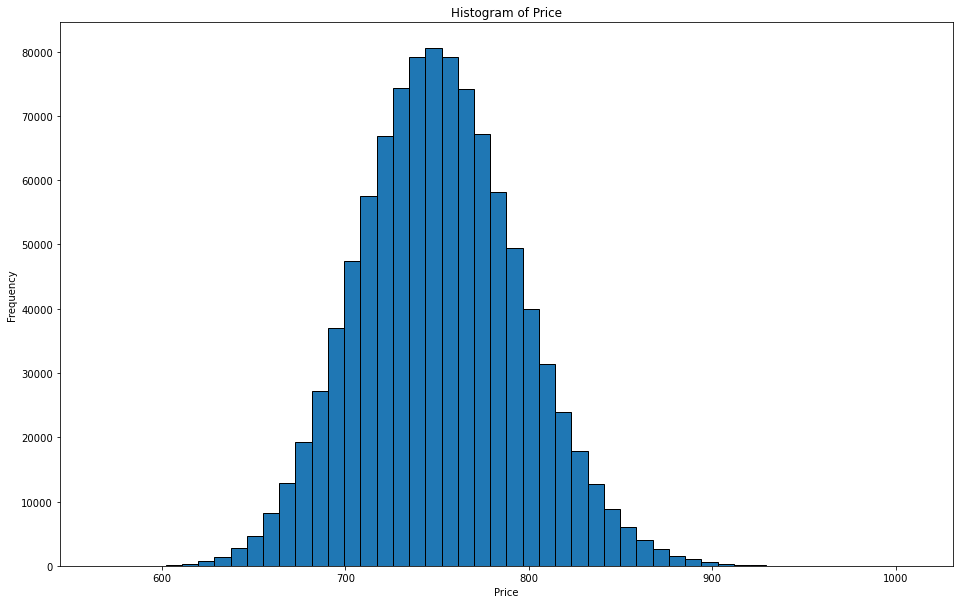

In [5]:
option = input("Enter option type: ")
if option != "Call" and option != "Put":
    print("Incorrect option! Please enter 'Call' or 'Put'.")
else:
    underlying_asset_price = input("Enter underlying asset price: ")
    S = float(underlying_asset_price)
    volatility = float(input("Enter Volatility (in %): "))
    v = float(volatility/100)
    risk_free_rate = float(input("Enter risk free rate (in %): "))
    r = float(risk_free_rate/100)
    t = 30 # 30 day option
    T = t / 365.0 
    K = float(input("Enter Strike Price: "))
    simulations = 1000000
    
    payoffs = []
    prices = []
    discount_factor = math.exp(-r * T)
    for i in range(simulations):
        St = random_price(S,v,r,T)
        prices.append(St)
        payoffs.append(payoff(option,St, K))
    
    price = discount_factor * (sum(payoffs) / float(simulations))
    print(option,'Price:',round(price,2))
    plt.figure(figsize=(16,10))
    plt.hist(prices, bins= 50, edgecolor = 'black')
    plt.title('Histogram of Price')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()